In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np

In [5]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [7]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


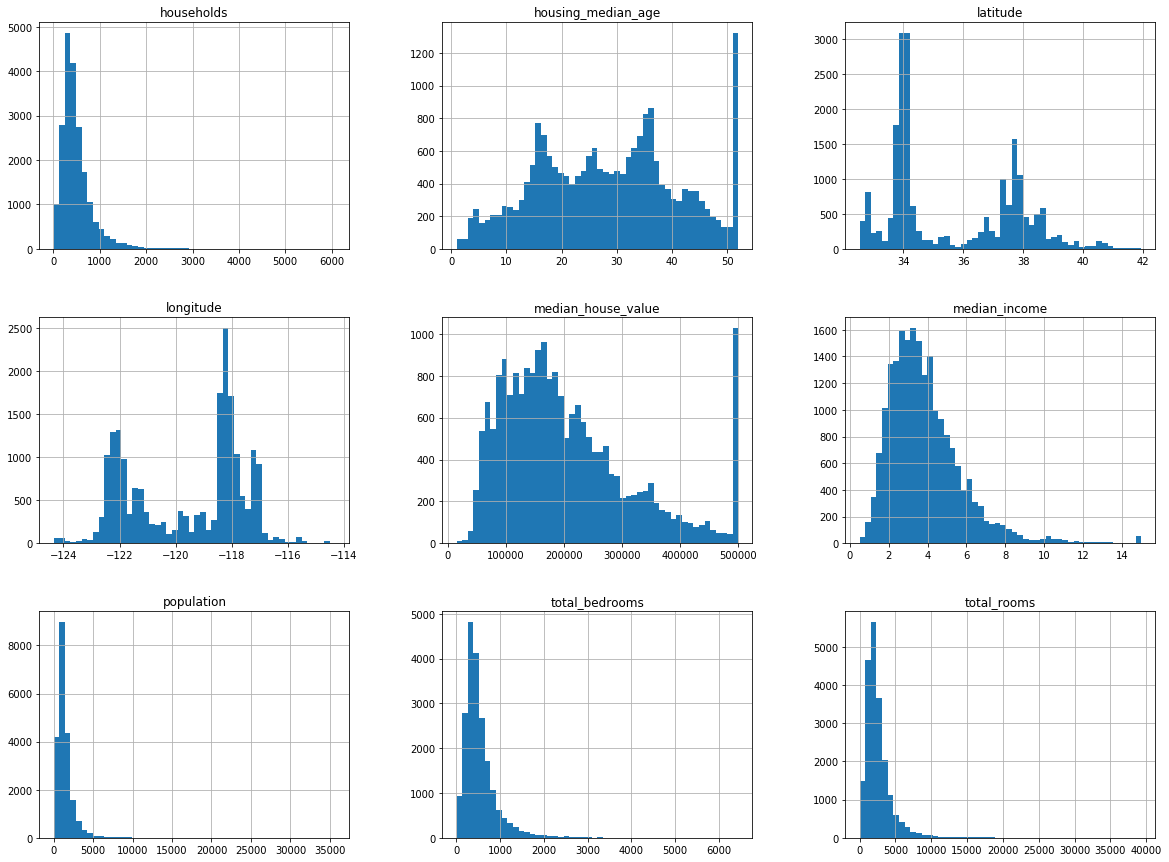

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
#create test set function.  Does pure random sampling.
def split_train_test(data, test_ratio):
    np.random.seed(42) #enure that if function is re-run same test set is generated, UNLESS dataset is updated.
    shuffled_indices= np.random.permutation(len(data))
    test_set_size= int(len(data) * test_ratio)
    test_indices= shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [18]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


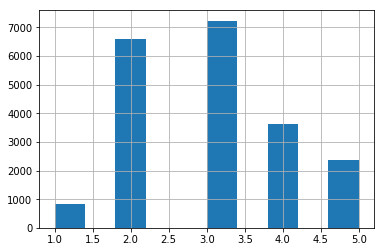

In [26]:
#convert income to categorical
housing["income_cat"]= np.ceil(housing["median_income"]/1.5)
#pandas method .where operates like an if then else function.  IF <5 keep, else put in 5.
#All the 6's and greater replaced with 5's.  Inplace means that instead of returning an object, the housing object itself is modified.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()
plt.show()

In [32]:
# if we want to do stratified sampling scikit learn has a nice function
from sklearn.model_selection import StratifiedShuffleSplit

#breaking from the books guide, i will call this split object because the split object has a method also called split
split_object = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#what is split_object?
split_object

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [47]:
#the book tells us to call the split method on the split object.  We pass it the full dataset and the attribute we want
type(split_object.split(housing, housing["income_cat"]))

generator

In [46]:
#http://scikit-learn.org/stable/datasets/index.html
split_object.split(housing, housing["income_cat"])

<generator object BaseShuffleSplit.split at 0x0000023E5B34D150>

In [48]:
#http://scikit-learn.org/stable/datasets/index.html
print(split_object.split(housing, housing["income_cat"]))

<generator object BaseShuffleSplit.split at 0x0000023E5B617F10>


In [49]:
# tuples in for loops: https://www.youtube.com/watch?v=NI26dqhs2Rk&t=194
# and https://www.daniweb.com/programming/software-development/threads/318651/two-variable-for-loop
# still this is interesting behavior that I'd like to learn more about... the two sets are different lengths
for train_index, test_index in split_object.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [55]:
len(strat_test_set),len(strat_train_set)
#no idea how this works.  Why a for loops is used, etc.  
#dir(split_object.split(housing, housing["income_cat"]))

(4128, 16512)

In [69]:
# these proportions match the income distribution in the original data far better than a full random sample
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [70]:
#remove incom_cat attribute now that test set is generated
# this for structure just does the same thing for both dataframes.  Not sure if set_ is special or just a normal placeholder
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [71]:
#overwrite housing (previously the full dataset) as just the training set.
housing= strat_train_set.copy()

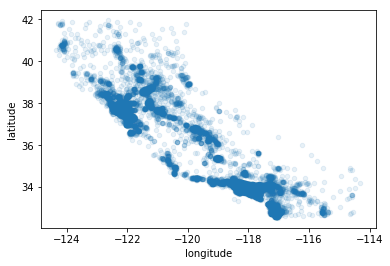

In [73]:
#visualizing geographic data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

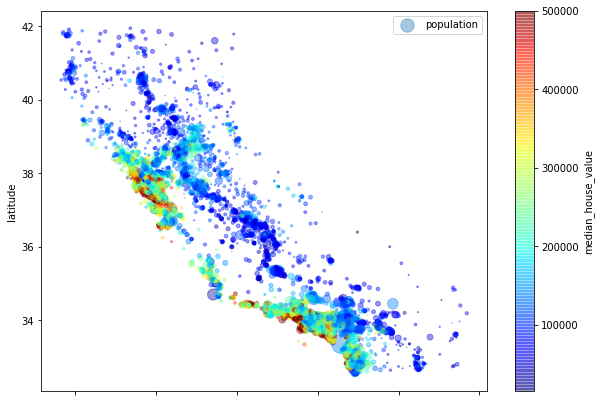

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

#for some reason there's a hanging comma at the end of the arguments.  Works without it.  Maybe tuple-related?

In [77]:
# pearson's r / correlation coefficient

corr_matrix= housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E5E4E19E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023E5FCD3F60>]], dtype=object)

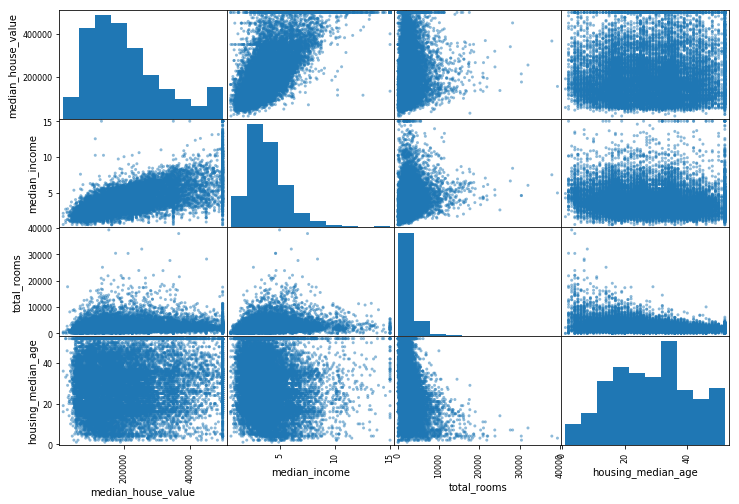

In [80]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

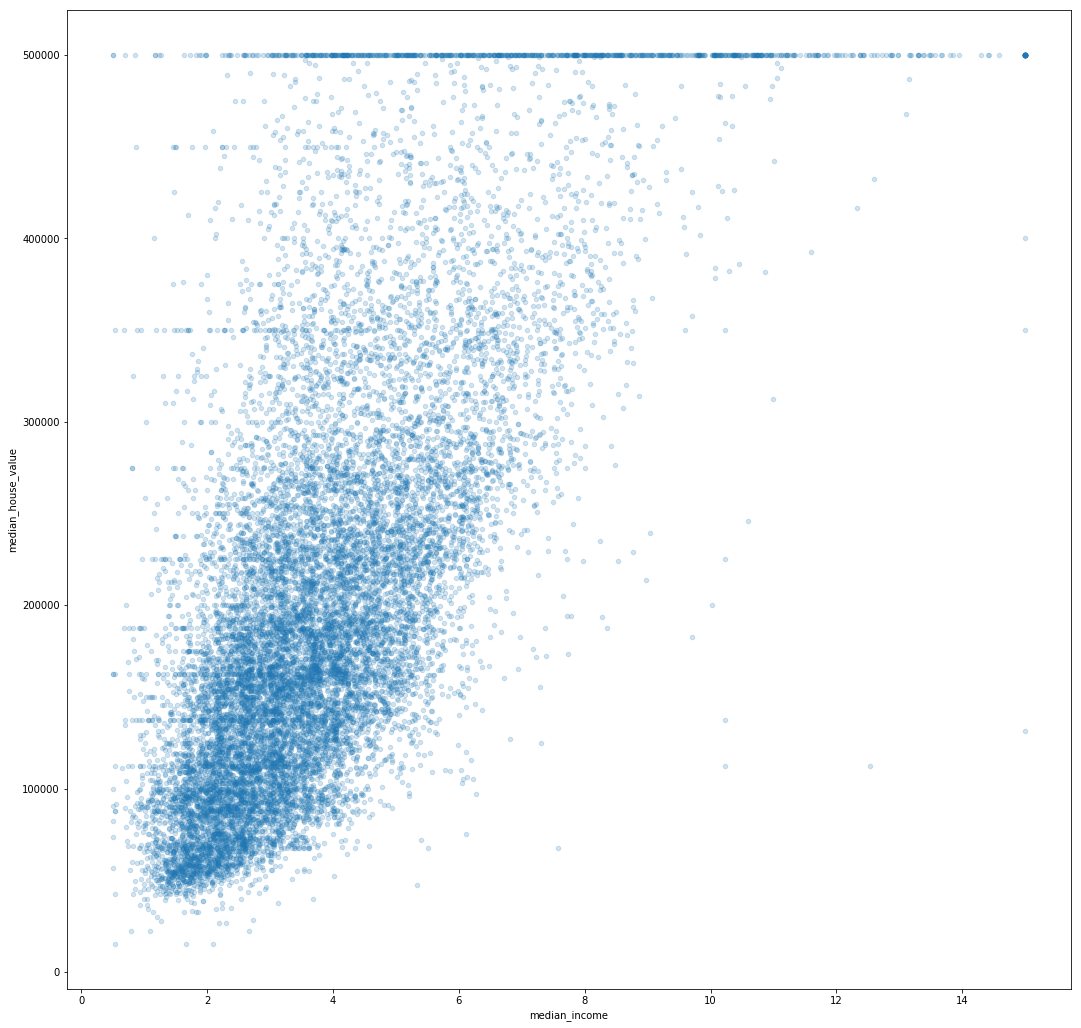

In [84]:
# median income has highest correlation with house value so lets look at that

housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.2, figsize=(18,18))
# note that certain home values are overrepresented.  value is capped at $500,000 so thats obvious,
# but there are a few more seeming lines of data in the scatterplot.

In [85]:
# generate new data attributes based on combinations/functions of existing elements.  These may be more relevant than the base data.

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64